In [2]:
#import necessary libraries for NASA Battery Data Analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.integrate import trapezoid

In [3]:
# Load the .mat file and extract the relevant data
mat_data = loadmat('B0005.mat')
raw_data = mat_data['B0005']        # Adjust the key based on the actual structure of the .mat file
discharge_indices = []              # List to store indices of discharge cycles
cycles = raw_data[0, 0]['cycle']    # Access the 'cycle' field from the structured array

# Iterate through the cycles to find indices of discharge cycles
for i in range(len(cycles[0])):         # Loop through each cycle
    cycle = cycles[0, i]                # Access the current cycle
    op_type = cycle['type'][0]          # Get the operation type (charge/discharge)
    if op_type == 'discharge':          
        discharge_indices.append(i)     # Append the index of the discharge cycle to the list

print(f"Discharge indices: {discharge_indices}")

Discharge indices: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 24, 26, 28, 30, 32, 34, 36, 38, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 135, 139, 143, 147, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 215, 219, 223, 227, 231, 235, 239, 243, 247, 251, 255, 259, 263, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 312, 315, 319, 323, 327, 331, 335, 339, 343, 347, 351, 355, 359, 363, 366, 370, 374, 378, 382, 386, 390, 394, 398, 402, 406, 410, 414, 418, 422, 426, 430, 432, 436, 440, 444, 448, 452, 456, 460, 464, 468, 472, 476, 480, 482, 484, 488, 492, 496, 500, 504, 508, 512, 516, 520, 524, 528, 532, 536, 540, 544, 547, 551, 555, 559, 563, 567, 571, 575, 579, 583, 587, 591, 595, 599, 603, 607, 611, 613]


In [5]:
# Access the first discharge cycle data and print available fields
cycle_data = cycles[0, discharge_indices[0]]  # Access the first discharge cycle data
raw_struct = cycle_data['data']                # Access the 'data' field from the cycle structure

print("Available fields in the data structure:", raw_struct.dtype.names)

Available fields in the data structure: ('Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load', 'Time', 'Capacity')


System: Loading NASA Battery Data...
Data Loaded. Total operational records: 616
Found 168 valid Discharge Cycles.
Extracting Data for Cycle 149...
Extraction Successful.
Datapoints Captured: 356


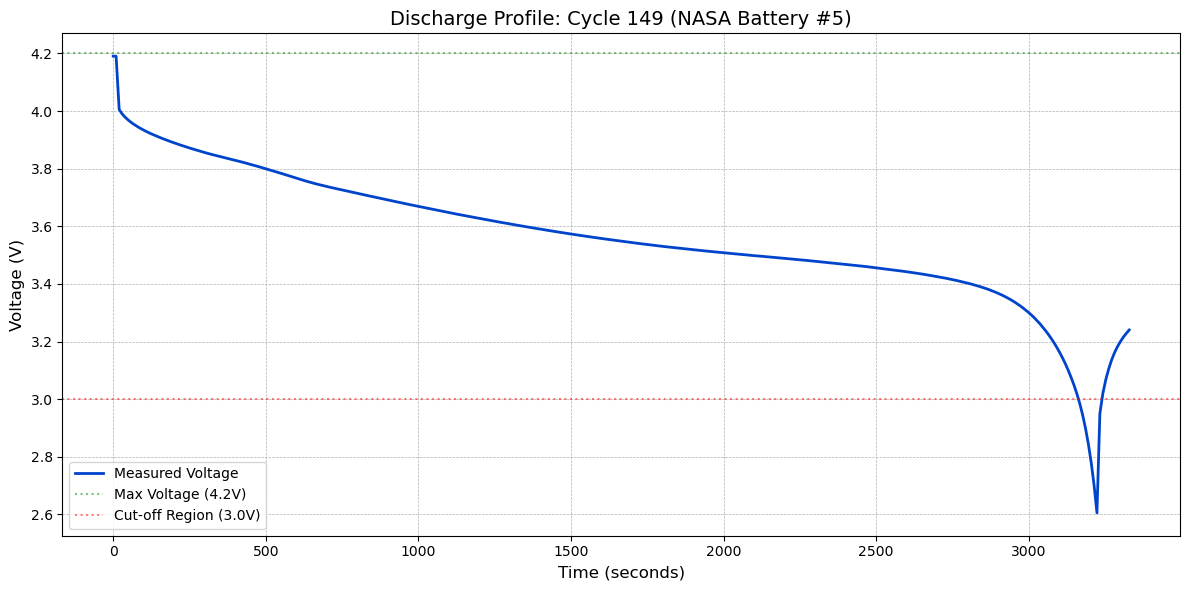

Note: The sharp voltage rise at the end represents the 'Relaxation Effect' after the discharge load is removed.


In [8]:
#Battery Health Analysis: Extracting Voltage and Time Data for Discharge Cycle
print("System: Loading NASA Battery Data...")
mat_data = loadmat('B0005.mat')
raw_data = mat_data['B0005']
cycles = raw_data[0, 0]['cycle']                                        # Access the 'cycle' field from the structured array
print(f"Data Loaded. Total operational records: {cycles.shape[1]}")     # Each record corresponds to a charge or discharge cycle.

# Identify Discharge Cycles
discharge_indices = []
for i in range(len(cycles[0])): 
    if cycles[0, i]['type'][0] == 'discharge':          # Check if the cycle type is 'discharge'
        discharge_indices.append(i)

print(f"Found {len(discharge_indices)} valid Discharge Cycles.")

target_cycle_index = discharge_indices[np.random.randint(len(discharge_indices))]  # Randomly select one discharge cycle for analysis

# Extract Voltage and Time Data for the Selected Discharge Cycle
print(f"Extracting Data for Cycle {target_cycle_index}...")
cycle_data = cycles[0, target_cycle_index]

# Dig into the MATLAB structure (The 'Onion' Layers)
# Layer 1: 'data' container
layer1 = cycle_data['data']
# Layer 2: The measurement wrapper
measurements = layer1[0, 0]

# Extract Voltage and Time arrays
voltage = measurements['Voltage_measured'].flatten()
time_sec = measurements['Time'].flatten()

print(f"Extraction Successful.")
print(f"Datapoints Captured: {len(voltage)}")

# Plotting the Discharge Profile
plt.figure(figsize=(12, 6))
plt.plot(time_sec, voltage, color='#0044cc', linewidth=2, label='Measured Voltage')
plt.title(f"Discharge Profile: Cycle {target_cycle_index} (NASA Battery #5)", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Highlight the Nominal Voltage (4.2V) and Cutoff (approx 2.7V - 3.0V)
plt.axhline(y=4.2, color='green', linestyle=':', alpha=0.5, label='Max Voltage (4.2V)')
plt.axhline(y=3.0, color='red', linestyle=':', alpha=0.5, label='Cut-off Region (3.0V)')

plt.legend()
plt.tight_layout()
plt.show()

# Interpretation Note
print("Note: The sharp voltage rise at the end represents the 'Relaxation Effect' after the discharge load is removed.")

In [9]:
#Data Extraction for Advanced Analysis
cycle_data = cycles[0, target_cycle_index]      # Access the selected discharge cycle data
layer1 = cycle_data['data']         # Access the 'data' field from the cycle structure (Layer 1)
measurements = layer1[0, 0]         # Access the measurement wrapper (Layer 2)

voltage = measurements['Voltage_measured'].flatten()                # Extract Voltage array and flatten it to 1D
current = measurements['Current_measured'].flatten()                # Extract Current array and flatten it to 1D
temperature = measurements['Temperature_measured'].flatten()        # Extract Temperature array and flatten it to 1D
time_sec = measurements['Time'].flatten()                           # Extract Time array and flatten it to 1D

print("Extraction Successful.")
print(f"V points: {len(voltage)}, I points: {len(current)}, T points: {len(temperature)}, Time points: {len(time_sec)}")

Extraction Successful.
V points: 356, I points: 356, T points: 356, Time points: 356


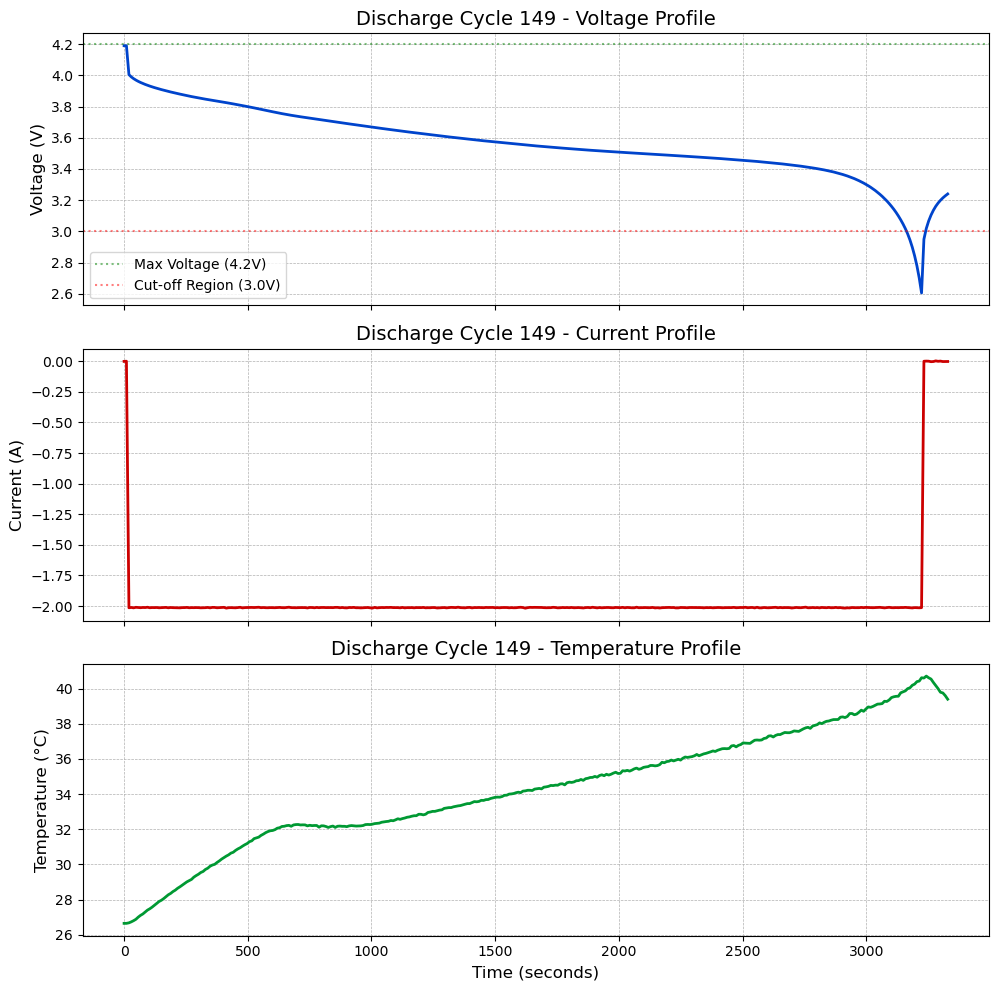

In [10]:
# Advanced Visualization: Voltage, Current, and Temperature Profiles

# Create a 3-row subplot to visualize Voltage, Current, and Temperature profiles together
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Plot Voltage Profile
ax1.plot(time_sec, voltage, color='#0044cc', linewidth=2)
ax1.set_ylabel("Voltage (V)", fontsize=12)
ax1.set_title(f"Discharge Cycle {target_cycle_index} - Voltage Profile", fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.axhline(y=4.2, color='green', linestyle=':', alpha=0.5, label='Max Voltage (4.2V)')
ax1.axhline(y=3.0, color='red', linestyle=':', alpha=0.5, label='Cut-off Region (3.0V)')
ax1.legend()

# Plot Current Profile
ax2.plot(time_sec, current, color='#cc0000', linewidth=2)
ax2.set_ylabel("Current (A)", fontsize=12)
ax2.set_title(f"Discharge Cycle {target_cycle_index} - Current Profile", fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot Temperature Profile
ax3.plot(time_sec, temperature, color='#009933', linewidth=2)
ax3.set_xlabel("Time (seconds)", fontsize=12)
ax3.set_ylabel("Temperature (°C)", fontsize=12)
ax3.set_title(f"Discharge Cycle {target_cycle_index} - Temperature Profile", fontsize=14)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()      # Adjust layout to prevent overlap
plt.show()

In [11]:
# Capacity Estimation and State of Health (SoH) Calculation
capacity_Ah = trapezoid(abs(current), time_sec) / 3600  # Integrate current over time to get capacity in Ah
print(f"Estimated Capacity for Cycle {target_cycle_index}: {capacity_Ah:.3f} Ah")

rated_capacity_Ah = 2.0  # The State of Health (SOH) was calculated based on the manufacturer's rated capacity of 2.0 Ah (Gen 2 18650 cells)
soh_percentage = (capacity_Ah / rated_capacity_Ah) * 100
print(f"State of Health (SoH) for Cycle {target_cycle_index}: {soh_percentage:.2f}%")

Estimated Capacity for Cycle 149: 1.796 Ah
State of Health (SoH) for Cycle 149: 89.82%
